In [154]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import tensorflow as tf
import matplotlib.pyplot as plt

In [155]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [156]:
# data shuffling
df = df.sample(frac=1)
df.shape

(768, 9)

In [157]:
features = df.iloc[:,:8].values
labels = df.iloc[:,8].values
mean = features.mean(axis=0)
features -= mean
std = features.std(axis=0)
features /= std

In [158]:
x_train = features[:384]
y_train = labels[:384]
x_test = features[384:600]
y_test = labels[384:600]
x_val = features[600:]
y_val = labels[600:]

In [160]:
k = 4
num_samples = len(features)//k
scores = []

for i in range(k):
    print("processing fold : ",i)
    val_x  = features[i*num_samples:(i+1)*num_samples]
    val_y  = labels[i*num_samples:(i+1)*num_samples]
    train_x  = np.concatenate([features[:i*num_samples],features[(i+1)*num_samples:]],axis=0)
    train_y  = np.concatenate([labels[:i*num_samples],labels[(i+1)*num_samples:]],axis=0)
    model = tf.keras.Sequential([
      tf.keras.layers.Dense(1000, activation='relu', input_shape=(8,)),# input shape required
      tf.keras.layers.Dense(500,activation='relu'),
      tf.keras.layers.Dense(250,activation='relu'),
      tf.keras.layers.Dense(1,activation='sigmoid')
        
    ])
    
    
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(train_x,train_y, epochs=40, batch_size=28 ,validation_data=(val_x,val_y))
    loss,acc = model.evaluate(val_x,val_y, verbose=2)
    scores.append(acc)
    


processing fold :  0
Train on 576 samples, validate on 192 samples
Epoch 1/40
576/576 [==============================] - 2s 4ms/sample - loss: 0.5416 - accuracy: 0.7535 - val_loss: 0.5066 - val_accuracy: 0.7344
Epoch 2/40
576/576 [==============================] - 0s 728us/sample - loss: 0.4694 - accuracy: 0.7795 - val_loss: 0.4982 - val_accuracy: 0.7135
Epoch 3/40
576/576 [==============================] - 0s 753us/sample - loss: 0.4590 - accuracy: 0.7795 - val_loss: 0.4985 - val_accuracy: 0.7708
Epoch 4/40
576/576 [==============================] - 0s 755us/sample - loss: 0.4443 - accuracy: 0.7934 - val_loss: 0.5562 - val_accuracy: 0.7135
Epoch 5/40
576/576 [==============================] - 0s 751us/sample - loss: 0.4342 - accuracy: 0.8003 - val_loss: 0.4997 - val_accuracy: 0.7396
Epoch 6/40
576/576 [==============================] - 0s 753us/sample - loss: 0.4182 - accuracy: 0.8021 - val_loss: 0.5012 - val_accuracy: 0.7604
Epoch 7/40
576/576 [==============================] - 0s 75

Epoch 16/40
576/576 [==============================] - 1s 958us/sample - loss: 0.3244 - accuracy: 0.8420 - val_loss: 0.6111 - val_accuracy: 0.7969
Epoch 17/40
576/576 [==============================] - 0s 755us/sample - loss: 0.3094 - accuracy: 0.8698 - val_loss: 0.6808 - val_accuracy: 0.7708
Epoch 18/40
576/576 [==============================] - 1s 895us/sample - loss: 0.3018 - accuracy: 0.8594 - val_loss: 0.7403 - val_accuracy: 0.7917
Epoch 19/40
576/576 [==============================] - 1s 868us/sample - loss: 0.2866 - accuracy: 0.8819 - val_loss: 0.6937 - val_accuracy: 0.7708
Epoch 20/40
576/576 [==============================] - 0s 810us/sample - loss: 0.2703 - accuracy: 0.8767 - val_loss: 0.7511 - val_accuracy: 0.7917
Epoch 21/40
576/576 [==============================] - 1s 979us/sample - loss: 0.2496 - accuracy: 0.8802 - val_loss: 0.7813 - val_accuracy: 0.7812
Epoch 22/40
576/576 [==============================] - 1s 996us/sample - loss: 0.2657 - accuracy: 0.8698 - val_loss: 0

576/576 [==============================] - 1s 881us/sample - loss: 0.0957 - accuracy: 0.9601 - val_loss: 1.6992 - val_accuracy: 0.6562
Epoch 32/40
576/576 [==============================] - 1s 876us/sample - loss: 0.0715 - accuracy: 0.9774 - val_loss: 1.9238 - val_accuracy: 0.7135
Epoch 33/40
576/576 [==============================] - 0s 734us/sample - loss: 0.1076 - accuracy: 0.9635 - val_loss: 2.0898 - val_accuracy: 0.6979
Epoch 34/40
576/576 [==============================] - 0s 868us/sample - loss: 0.0853 - accuracy: 0.9705 - val_loss: 1.9625 - val_accuracy: 0.7135
Epoch 35/40
576/576 [==============================] - 0s 727us/sample - loss: 0.0520 - accuracy: 0.9861 - val_loss: 2.7754 - val_accuracy: 0.6979
Epoch 36/40
576/576 [==============================] - 0s 724us/sample - loss: 0.0803 - accuracy: 0.9653 - val_loss: 2.2513 - val_accuracy: 0.6875
Epoch 37/40
576/576 [==============================] - 0s 724us/sample - loss: 0.0457 - accuracy: 0.9878 - val_loss: 2.9971 - val_

In [161]:
loss = history.history["loss"]
acc = history.history["accuracy"]
val_loss = history.history["val_loss"]
val_acc = history.history["val_accuracy"]


print(np.mean(scores))

0.703125


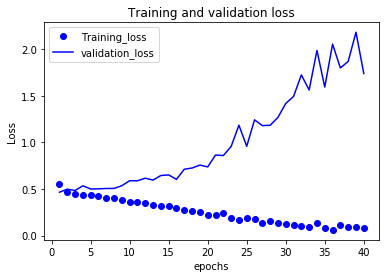

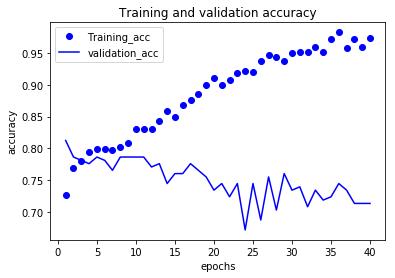

In [168]:
# for loss
 
epochs = range(1, len(acc)+1)
plt.plot(epochs,loss,"bo",label = "Training_loss")
plt.plot(epochs,val_loss,"b",label = "validation_loss")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

# for accuracy
 
val_acc = history.history["val_accuracy"]
epochs = range(1, len(acc)+1)
plt.plot(epochs,acc,"bo",label = "Training_acc")
plt.plot(epochs,val_acc,"b",label = "validation_acc")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.show()

In [163]:
evaluation = model.evaluate(x_test,  y_test, verbose=2)

216/1 - 0s - loss: 1.2120 - accuracy: 0.9491


In [164]:
m =model.predict_classes(x_test[2:3])
print(m)
print(y_test[2:3])

[[1]]
[1]
